<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:27%; left:10%;">
    Introduction to HTTP using Python
</h1>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:56%; left:10%;">
    David Mertz, Ph.D.
</h3>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:63%; left:10%;">
    Data Scientist
</h3>
</div>

# HTTP Servers

This section will somewhat parallel the prior one.  We look at the very simple server in the Python standard library, then move up to the widely use third-party library Flask. 

The nomenclature of Python web servers can be somewhat confusing.  Actual **servers** focus on the underlying sockets, i.e. servicing connections efficiently and in a scalable way.  However, the actual processing of HTTP headers and bodies, both in receiving requests and generating responses, is usually passed to an HTTP **framework**.  These different bits of code usually communicate over an interface called WSGI (Web Services Gateway Interface).

The nomenclature is fuzzy, however.  "Servers" such as Gunicorn, Nginx, Tornado, Twisted, or indeed the well-established Apache, all themselves include the ability to serve basic pages with no framework, or in a sense include a basic framework.  "Frameworks" such as Flask, Django, web2py, or TurboGears (or *many others*) also include a basic development server in their package.

At opposite ends of the spectrum of frameworks are Django and Flask.  The others fall somewhere in the middle. Django includes everything you can imagine, and many things you cannot, related to *web development*, from a MVC (model-view-controller) architecture, to its own database object-relational mapper (ORM), to an elaborate templating system, to an integrated administration interface, to an embedded framework of metaclasses, to many other elements.

Flask, in contrast, does as little as possible, in as simple a way as possible.  If you wish to do those many other web development tasks, it does not get in the way of you using other tools for each task, but it does not prescribe particular choices, nor include them in the library itself.

A week long bootcamp might scratch the surface on *some* of the corners of Django; an hour of video presentation in this course (perhaps with a couple more hours in the related course, *Secure RESTful APIs using Python*) will cover most of what Flask does.

## The Standard Library

Python's standard library contains a simple HTTP server called `http.server`.  If all you wish to do is match the original intention of the HTTP protocol—i.e. make local resources navigable and available remotely—this server does that.  For illustration, we use the Jupyter `HTML` and `Image` display objects to render content, but we could look at the raw bodies if we preferred.

In order to get this server running, I simply ran the following in the local directory:

```bash
python -m http.server 2503
```

This generates and HTML version of the directory listing by the server.

In [1]:
from IPython.core.display import HTML, Image
import requests

resp = requests.get('http://popbox.kdm.local:2503')
print(resp.status_code, resp.reason)
for k, v in resp.headers.items():
    print(f'{k}: {v}')

HTML(resp.text)

200 OK
Server: SimpleHTTP/0.6 Python/3.8.10
Date: Fri, 11 Jun 2021 02:31:53 GMT
Content-type: text/html; charset=utf-8
Content-Length: 736


This also provides paths to those files that are present, served over HTTP.  Content type is inferred from extension.

In [2]:
resp = requests.get('http://popbox.kdm.local:2503/greetings.txt')
print(resp.status_code, resp.reason)
for k, v in resp.headers.items():
    print(f'{k}: {v}')

print()
print(resp.content.decode()[:75])

200 OK
Server: SimpleHTTP/0.6 Python/3.8.10
Date: Fri, 11 Jun 2021 02:33:55 GMT
Content-type: text/plain
Content-Length: 375
Last-Modified: Wed, 09 Jun 2021 04:34:16 GMT

Bonjour
Salut
Hola
¿Qué tal?
Zdravstvuyte
Privet
Nǐn hǎo
Nǐ hǎo
Salve
Ciao



In [3]:
resp = requests.get('http://popbox.kdm.local:2503/no-such-file.txt')
print(resp.status_code, resp.reason)
print()
print(resp.text)

404 File not found

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN"
        "http://www.w3.org/TR/html4/strict.dtd">
<html>
    <head>
        <meta http-equiv="Content-Type" content="text/html;charset=utf-8">
        <title>Error response</title>
    </head>
    <body>
        <h1>Error response</h1>
        <p>Error code: 404</p>
        <p>Message: File not found.</p>
        <p>Error code explanation: HTTPStatus.NOT_FOUND - Nothing matches the given URI.</p>
    </body>
</html>



The Jupyter widget properly renders pages, including referenced resources.

In [4]:
resp = requests.get('http://popbox.kdm.local:2503/hello.html')
print(resp.status_code, resp.reason)
for k, v in resp.headers.items():
    print(f'{k}: {v}')

HTML(resp.text)

200 OK
Server: SimpleHTTP/0.6 Python/3.8.10
Date: Fri, 11 Jun 2021 02:35:58 GMT
Content-type: text/html
Content-Length: 214
Last-Modified: Thu, 10 Jun 2021 20:37:01 GMT


In [5]:
print(resp.text)

<html>
  <head>
    <title>Test Page</title>
  </head>
  <body>
    <h3>Hello Student!</h3>
    <p>This simple page contains the Python Software Foundation logo.</p>
    <img src="psf-logo.png"/>
  </body>
</html>



---

200 OK
Server: SimpleHTTP/0.6 Python/3.8.10
Date: Fri, 11 Jun 2021 02:37:08 GMT
Content-type: image/png
Content-Length: 9405
Last-Modified: Thu, 10 Jun 2021 20:34:40 GMT



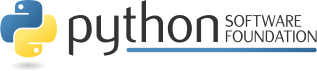

In [6]:
resp = requests.get('http://popbox.kdm.local:2503/psf-logo.png')
print(resp.status_code, resp.reason)
for k, v in resp.headers.items():
    print(f'{k}: {v}')
print()

Image(resp.content)

---

Of course, quite likely you might like a server to do something beyond sharing files on disk.  This is possible in `http.server` by defining a class with methods `.do_GET()`, `do_POST()` and so on.  Let's first look at an interaction with a customized server:

In [7]:
resp = requests.get('http://popbox.kdm.local:2504/some-file.txt')
print(resp.status_code, resp.reason)
for k, v in resp.headers.items():
    print(f'{k}: {v}')

HTML(resp.text)

200 OK
Server: BaseHTTP/0.6 Python/3.8.10
Date: Fri, 11 Jun 2021 02:38:46 GMT
X-INE-Course: HTTP using Python


---

This server simply indicates the path requested by the client.  It is free to do what it likes with that information, or indeed with any of the header information provided.  The subclass `SimpleHTTPRequestHandler` was used when we simply ran the module itsef. It decided to examine those HTTP paths, and return 404 if they do not correspond local file, but otherwise return the file content with a header indicating an appropriate `Content-Type`.

A server we write ourselves may not take paths as corresponding to files, but it would be free to check the filesystem if that is relevant.  Alternately, it might perform calculations, query databases, or take other actions appropriate to the path and/or query parameters provided in the request.

The code that makes up this server is not complex, and it illustrates how you might customize it.  However, the style of coding is distinctly "old fashioned", as will become more evident in comparison to `requests`.

```python
#!/usr/bin/env python
from http.server import BaseHTTPRequestHandler, HTTPServer
from time import asctime

class Server(BaseHTTPRequestHandler):
    def do_GET(self):
        self.send_response(200)
        self.send_header('X-INE-Course', 'HTTP using Python')
        self.end_headers()
        self.wfile.write(f"<h3>Request details:</h3>\n".encode())
        self.wfile.write(f"<p>You accessed path: {self.path}</p>\n".encode())
        self.wfile.write(b"<blockquote><pre>\n")
        self.wfile.write(f"{self.requestline}\n{self.headers}".encode())
        self.wfile.write(b"</pre></blockquote>\n")

host, port = "0.0.0.0", 2504
server = HTTPServer((host, port), Server)

print(f"{asctime()} Server Start: ({host}:{port})")
try:
    server.serve_forever()
except KeyboardInterrupt:
    server.server_close()
print(f"{asctime()} Server Stop")
```

When run at the command line, we can cancel the server with Ctrl-C.  For example:

```
% ./server4.py
Thu Jun 10 21:21:01 2021 Server Start: (0.0.0.0:2504)
192.168.50.11 - - [10/Jun/2021 21:21:03] "GET / HTTP/1.1" 200 -
192.168.50.11 - - [10/Jun/2021 21:21:31] "GET /some-file.txt HTTP/1.1" 200 -
^CThu Jun 10 21:23:03 2021 Server Stop
```

## Modern HTTP with Flask

Flask provides a flexible, robust, and modern API for writing HTTP servers. It cooperates easily with high-performance web servers, when desired.  The examples in this course will use the "Werkzeug" development server that is included in Flask. However, the exact same framework code can be used for different underlying servers.

For example, I might launch one of the servers provided in the repository for this course with, e.g.:

```bash
$ FLASK_APP=myserver.py flask run
```

In practice, I include a main block in the files to launch them as executable files, as you will see.  But if I configured a production system, I might instead launch the very same server using, e.g.:

```bash
$ gunicorn -w 4 -b 127.0.0.1:2510 myserver:app
$ uwsgi --http 127.0.0.1:2511 --module myserver:app
$ twistd -n web --port tcp:2512 --wsgi myserver.app
```

The command-line switches are slightly different, but those lines would launch the same web application, `myserver.py` on ports 2501, 2511, 2512, served by different servers.  Other servers are similar as well; some may require a half dozen, or fewer, lines to launch the identical Flask application rather than only a command line.

